<a href="https://colab.research.google.com/github/laliali20/dsi_preassignment/blob/main/DSIPreAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

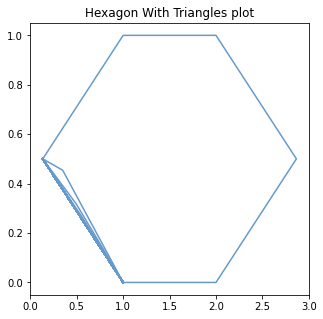

In [44]:
import math
from shapely.geometry.polygon import LinearRing, Polygon
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import rankdata

# function to randomly select point within the hexagon
def random_point(edges):
    x_points_max = [max(val[0][0], val[1][0]) for val in edges]
    x_points_min = [min(val[0][0], val[1][0]) for val in edges]
    y_points_max = [max(val[0][1], val[1][1]) for val in edges]
    y_points_min = [min(val[0][1], val[1][1]) for val in edges]
    x_random = np.random.rand()
    point_x = x_random * (max(x_points_max) - min(x_points_min)) + min(x_points_min) 
    slopes = [(val[0][1] - val[1][1])/(val[0][0] - val[1][0]) for val in edges]
    intercepts  = [val[0][1] - ((val[0][1] - val[1][1])/(val[0][0] - val[1][0])) * val[0][0] for val in edges]
    y_values = np.array(slopes) * point_x + np.array(intercepts)
    consider_edge = np.zeros(len(edges))
    
    for i in range(len(y_values)):
        if y_values[i] <= y_points_max[i] and y_values[i] >= y_points_min[i] and point_x <= x_points_max[i] and point_x >= x_points_min[i]   :
            consider_edge[i] = 1

    y_random = np.random.rand()
    considered_edges  = [i for i, val in enumerate(consider_edge) if (val==1)]
    considered_edges_values = y_values[considered_edges]

    if sum(consider_edge) == 2: 
        y_length = abs(considered_edges_values[0] - considered_edges_values[1])
        point_y = min(considered_edges_values) + y_random * y_length
    elif sum(consider_edge) == 4:
        ranked_ys = rankdata(considered_edges_values)
        interval1_items = [considered_edges_values[i] for i, val in enumerate(ranked_ys) if (val <= 2)]
        interval2_items = [considered_edges_values[i] for i, val in enumerate(ranked_ys) if (val > 2)]
        interval1_len = abs(interval1_items[0] - interval1_items[1])
        interval2_len = abs(interval2_items[0] - interval2_items[1])
        interval = interval1_len + interval2_len
        # interval
        interval1_prob = interval1_len/interval
        if y_random <= interval1_prob:
            point_y = min(interval1_items) + interval * y_random
        else:
            point_y = min(interval2_items) +   (interval * y_random) - interval1_len         
    return [point_x,point_y]

# function to find closest adjacent edge (I  was initially using vertices)
def find_closest_adjacent_verices(random_point, edges): 
    distance = 1000000000
    # distances = []
    closest_edge = []
    for edge in edges:
        midpoint_x = (edge[0][0] + edge[1][0])/2
        midpoint_y = (edge[0][1] + edge[1][1])/2
        temp_distance  = math.sqrt(((midpoint_x - random_point[0]) ** 2)  +  ((midpoint_y - random_point[1]) ** 2))
        
        if temp_distance < distance:
            distance = temp_distance
            closest_edge = edge 
        # distances.append(temp_distance)      
    return closest_edge


# define hexagon vertices and edges
a = 1 - (math.sqrt(3)/2)
b = 2 + (math.sqrt(3)/2)

#### Main Code
# regular hexagon 
hex_veritices = [(a, 0.5), (1, 1), (2, 1), (b, 0.5), (2, 0), (1, 0)]
edges = [[(a, 0.5),(1, 1)], [(a, 0.5),(1, 0)], [(1, 1), (2, 1)], [(1, 0), (2, 0)], [(b, 0.5), (2, 0)], [(b, 0.5), (2, 1)]] 

# irregular hexagon
# hex_veritices = [(1,10), (2,8), (5, 11), (2, 14), (1, 13), (2, 11)]  
# edges = [[(1,10), (2,8)], [(2,8), (5, 11)], [(5, 11), (2, 14)], [(2, 14), (1, 13)], [(1, 13), (2, 11)], [(2, 11), (1,10)]]  

poly = Polygon(hex_veritices)

# make triangles
triangles  = []
random_point_x = []
random_point_y = []
shape = [poly]
random_point = random_point(edges)
for  i in range(0, 10000):
    random_point_x.append(random_point[0])
    random_point_y.append(random_point[1])
    vert = find_closest_adjacent_verices(random_point, edges)
    triangles.append([vert[0], vert[1], (random_point[0],random_point[1])])
    shape.append(Polygon([vert[0], vert[1], (random_point[0],random_point[1])]))
    random_point = [(vert[0][0] + vert[1][0] + random_point[0])/3, (vert[0][1] + vert[1][1] + random_point[1])/3]
fig, axs = plt.subplots()
fig.set_size_inches(5, 5)
for poly in shape:    
    xs, ys = poly.exterior.xy    
    axs.plot(xs, ys, color='#6699cc' ) 
plt.title("Hexagon With Triangles plot")
plt.show()

# poly = Polygon(hex_veritices)
# fig, axs = plt.subplots()
# xs, ys = poly.exterior.xy    
# plt.plot(xs, ys, color='#6699cc' ) 
#     # , alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
# # plt.show()
# # axs.plot(random_points)

# # axs.plot(random_point_x, random_point_y)
# plt.title("Hexagon With Points plot")
# plt.show()
